# 2D Visualizations of Graphs

Visualization of k-NN graphs with k = 5 or 15 for both our combined descriptors and the [combined model](https://cdn.aaai.org/ISMB/1999/ISMB99-005.pdf).

In [1]:
%load_ext autoreload
%autoreload 2

from experiment_utils import compute_knn, compute_descriptors_from_file
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import preprocessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
file = "proteins"
df = compute_descriptors_from_file(file)

In [3]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(df["labels"])

In [4]:
def create_drawing(data, classes, descriptors, n_neighbors, variant, title):
    knn_graph = compute_knn(data, descriptor_list=descriptors, n_neighbors=n_neighbors, variant=variant)

    graph = nx.from_numpy_array(knn_graph)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)
    pos = nx.kamada_kawai_layout(graph)  # Layout for visualization
    nx.draw(graph, pos, with_labels=False, node_size=200, node_color=classes, cmap=plt.cm.tab10, ax=ax)
    
    fig.patch.set_facecolor('#333333')
    fig.suptitle(f"{variant.capitalize()} {title} (k = {n_neighbors})", color="white", fontsize=18)
    fig.tight_layout()
    
    plt.savefig(f"figures/{file}/graph_viz/knn_graph_{n_neighbors}_{variant}_{'_'.join(descriptors)}.png")
    plt.show()

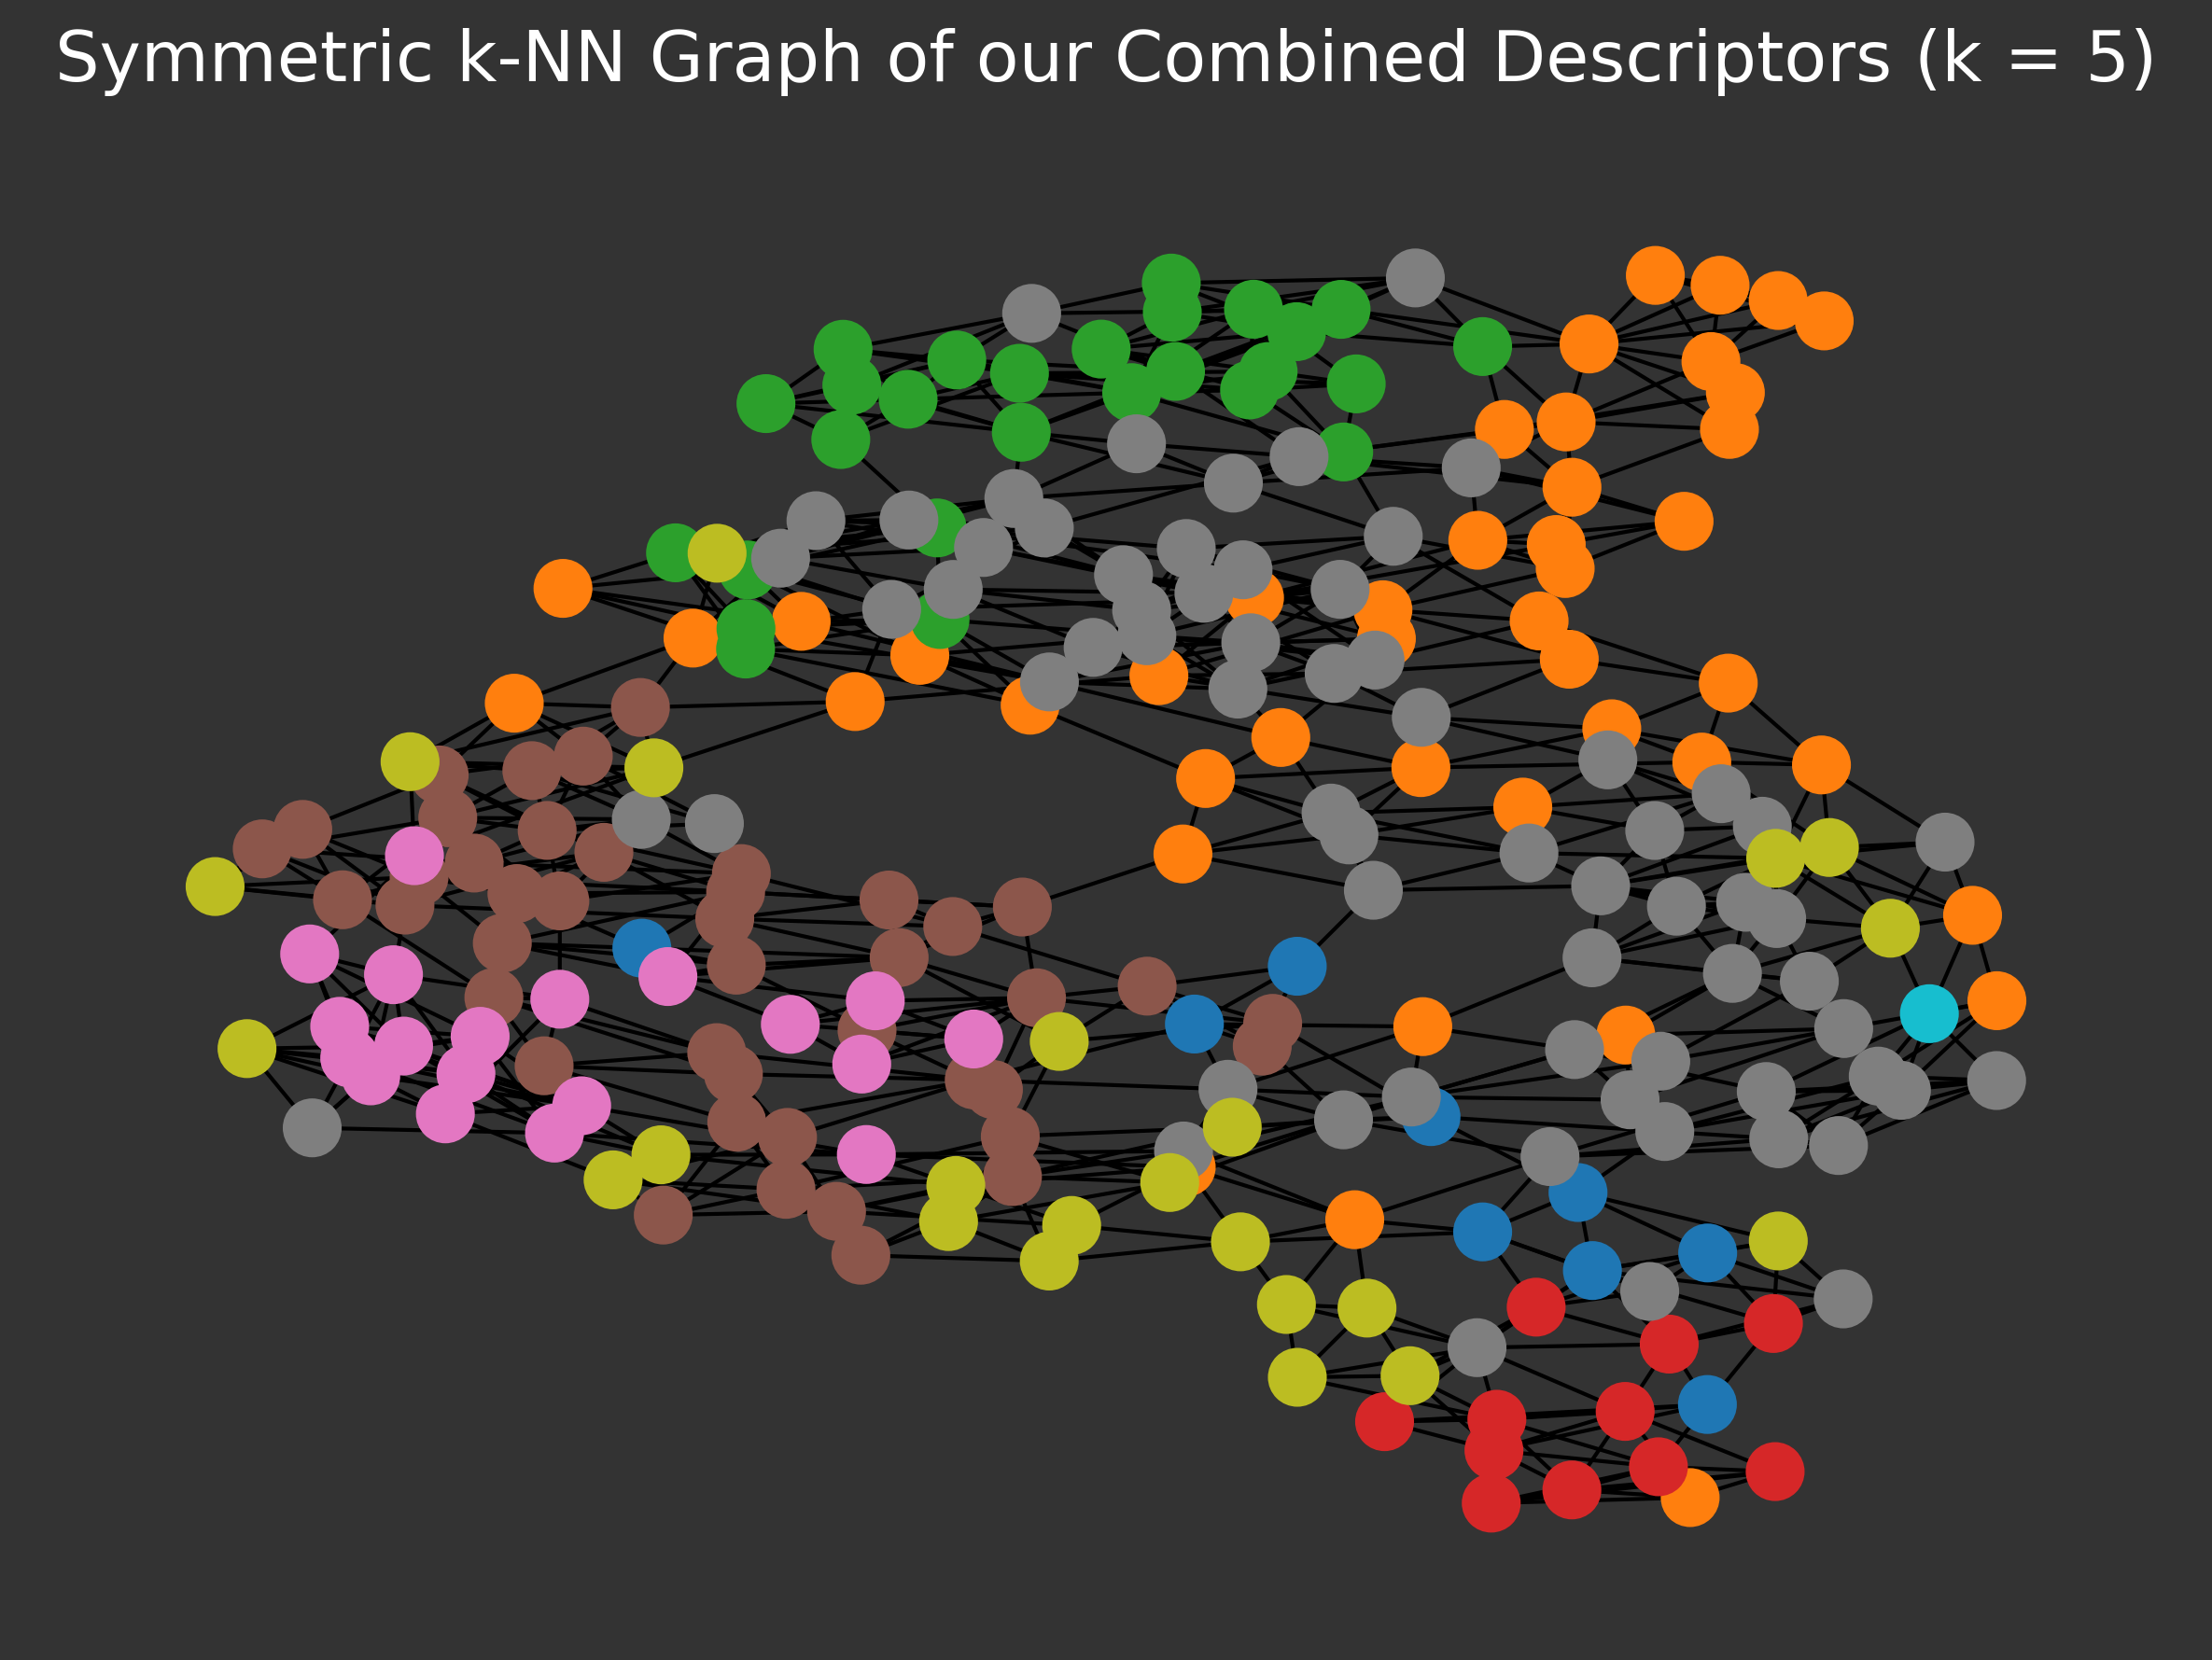

In [13]:
create_drawing(df, labels, ['evrap', 'samp_3d', 'scomp_3d', 'sirm_3d'], 5, 'symmetric', "k-NN Graph of our Combined Descriptors")

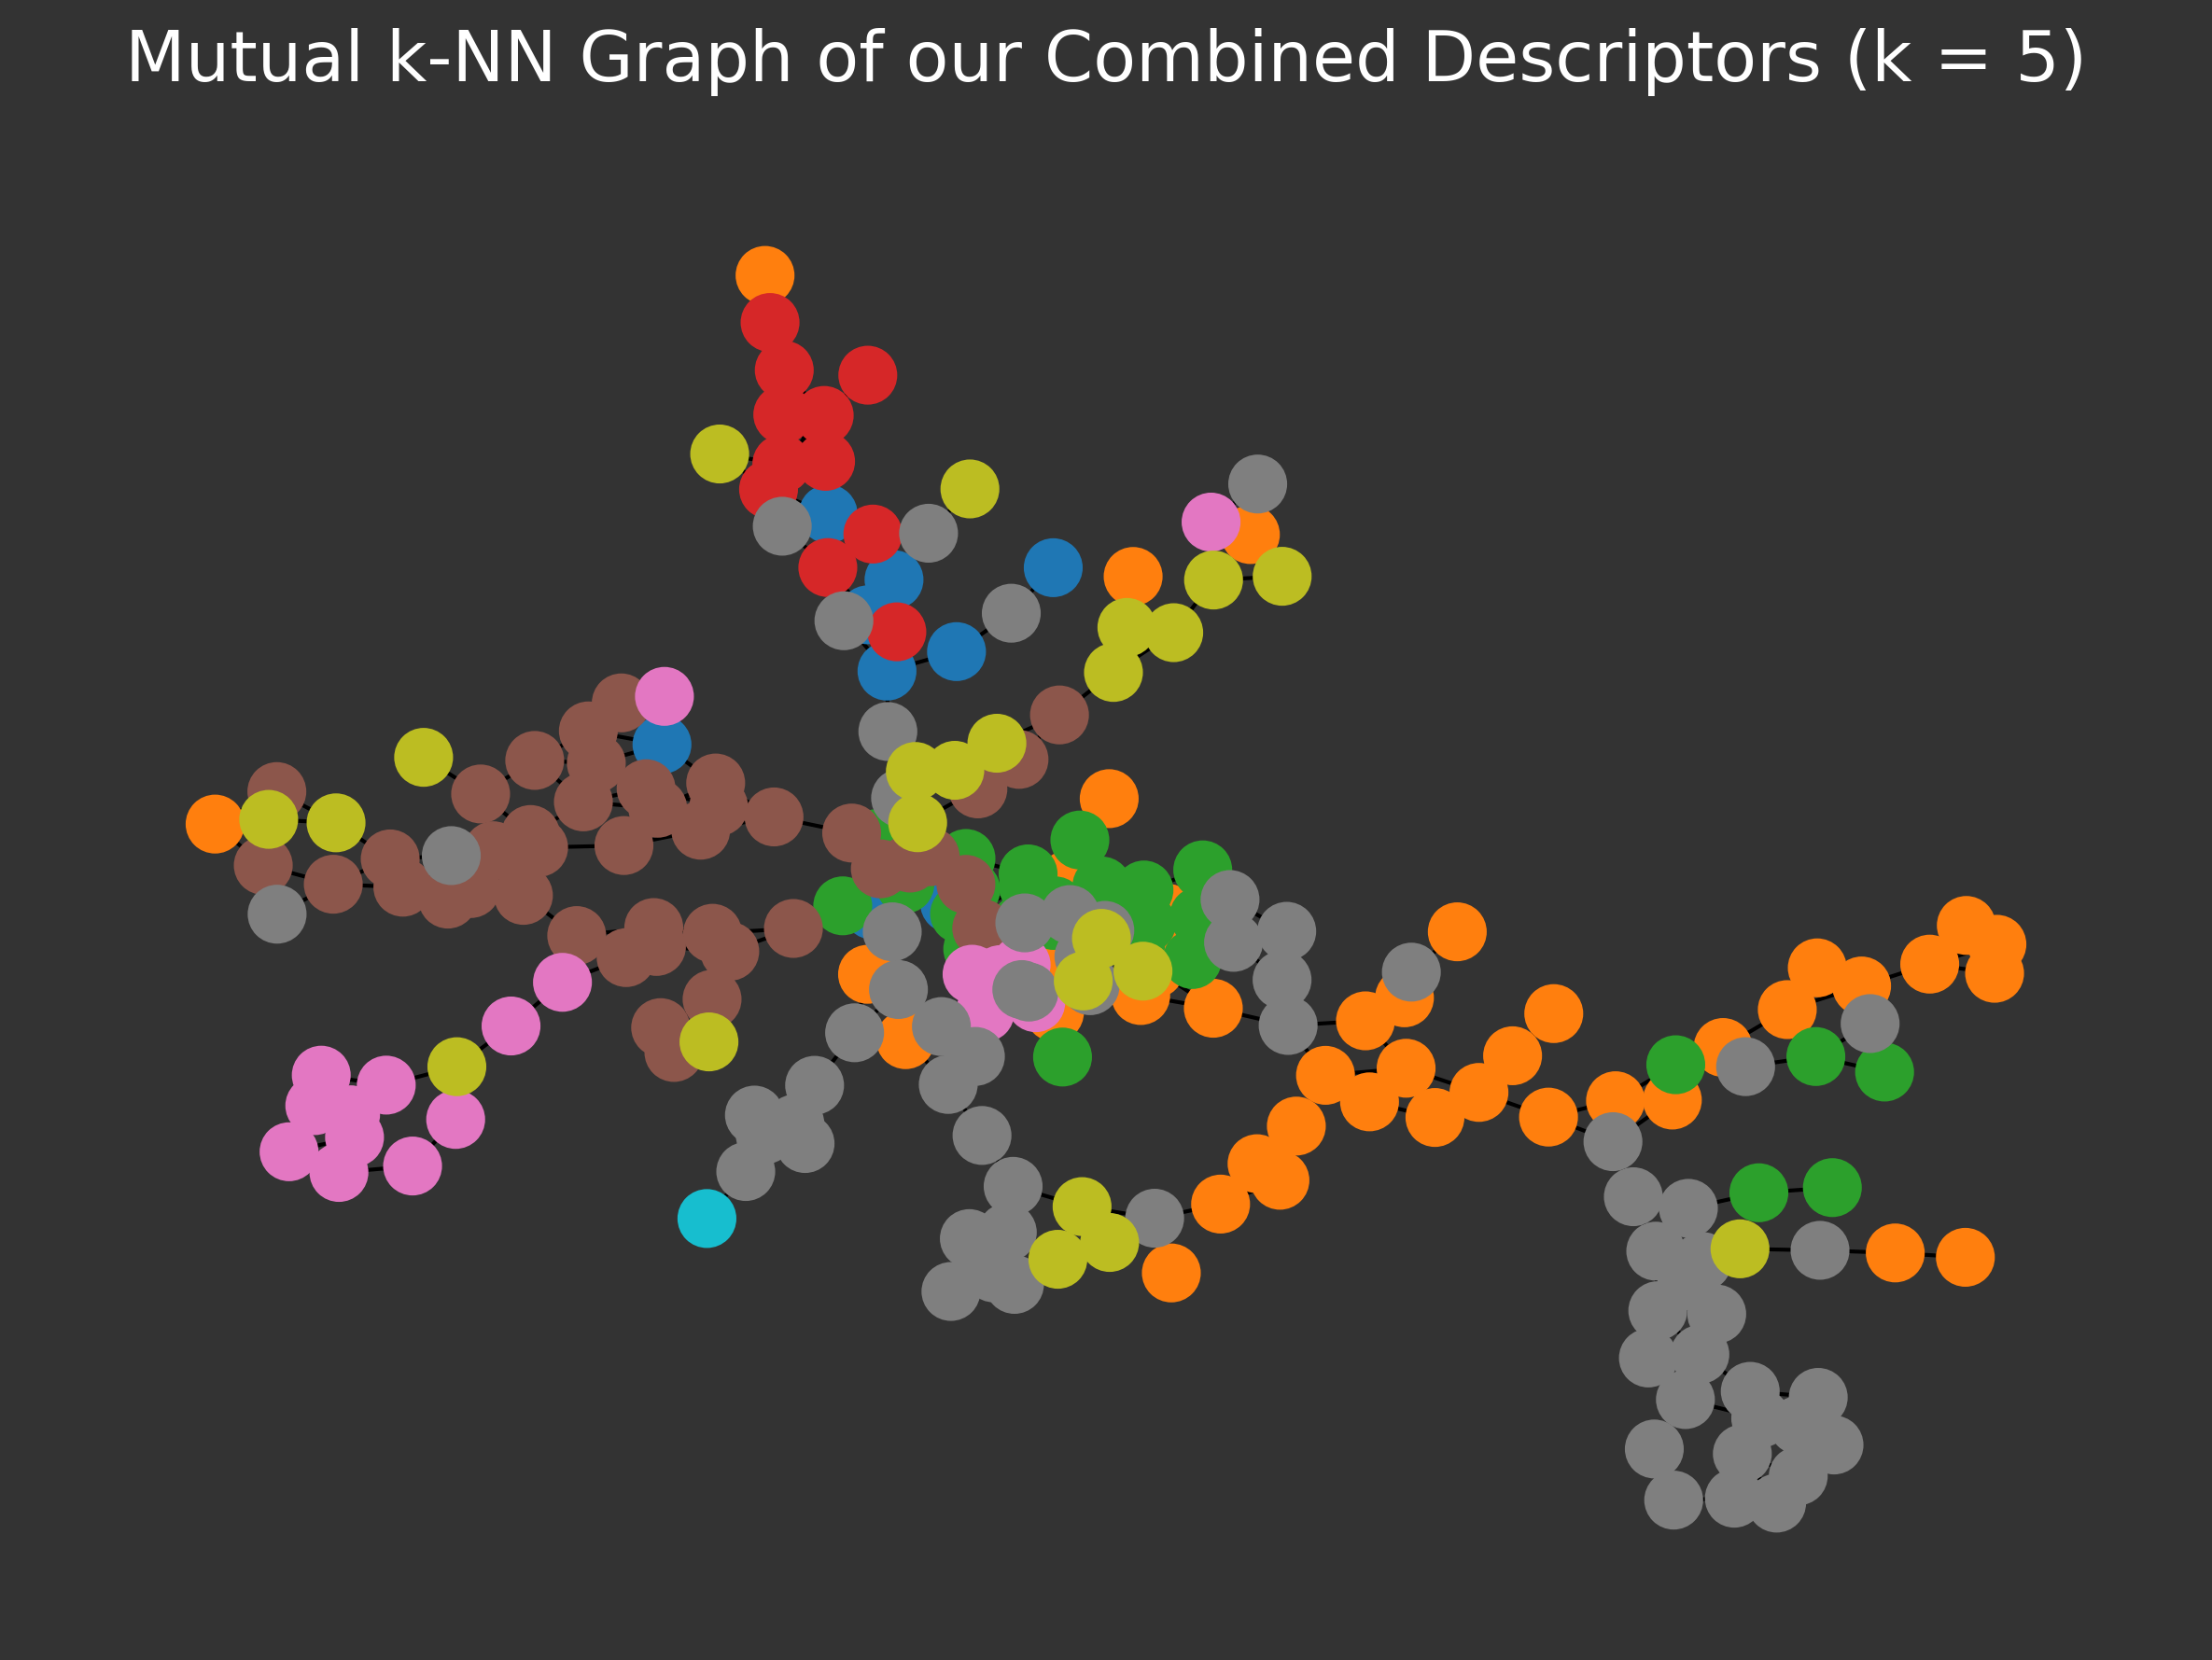

In [14]:
create_drawing(df, labels, ['evrap', 'samp_3d', 'scomp_3d', 'sirm_3d'], 5, 'mutual', "k-NN Graph of our Combined Descriptors")

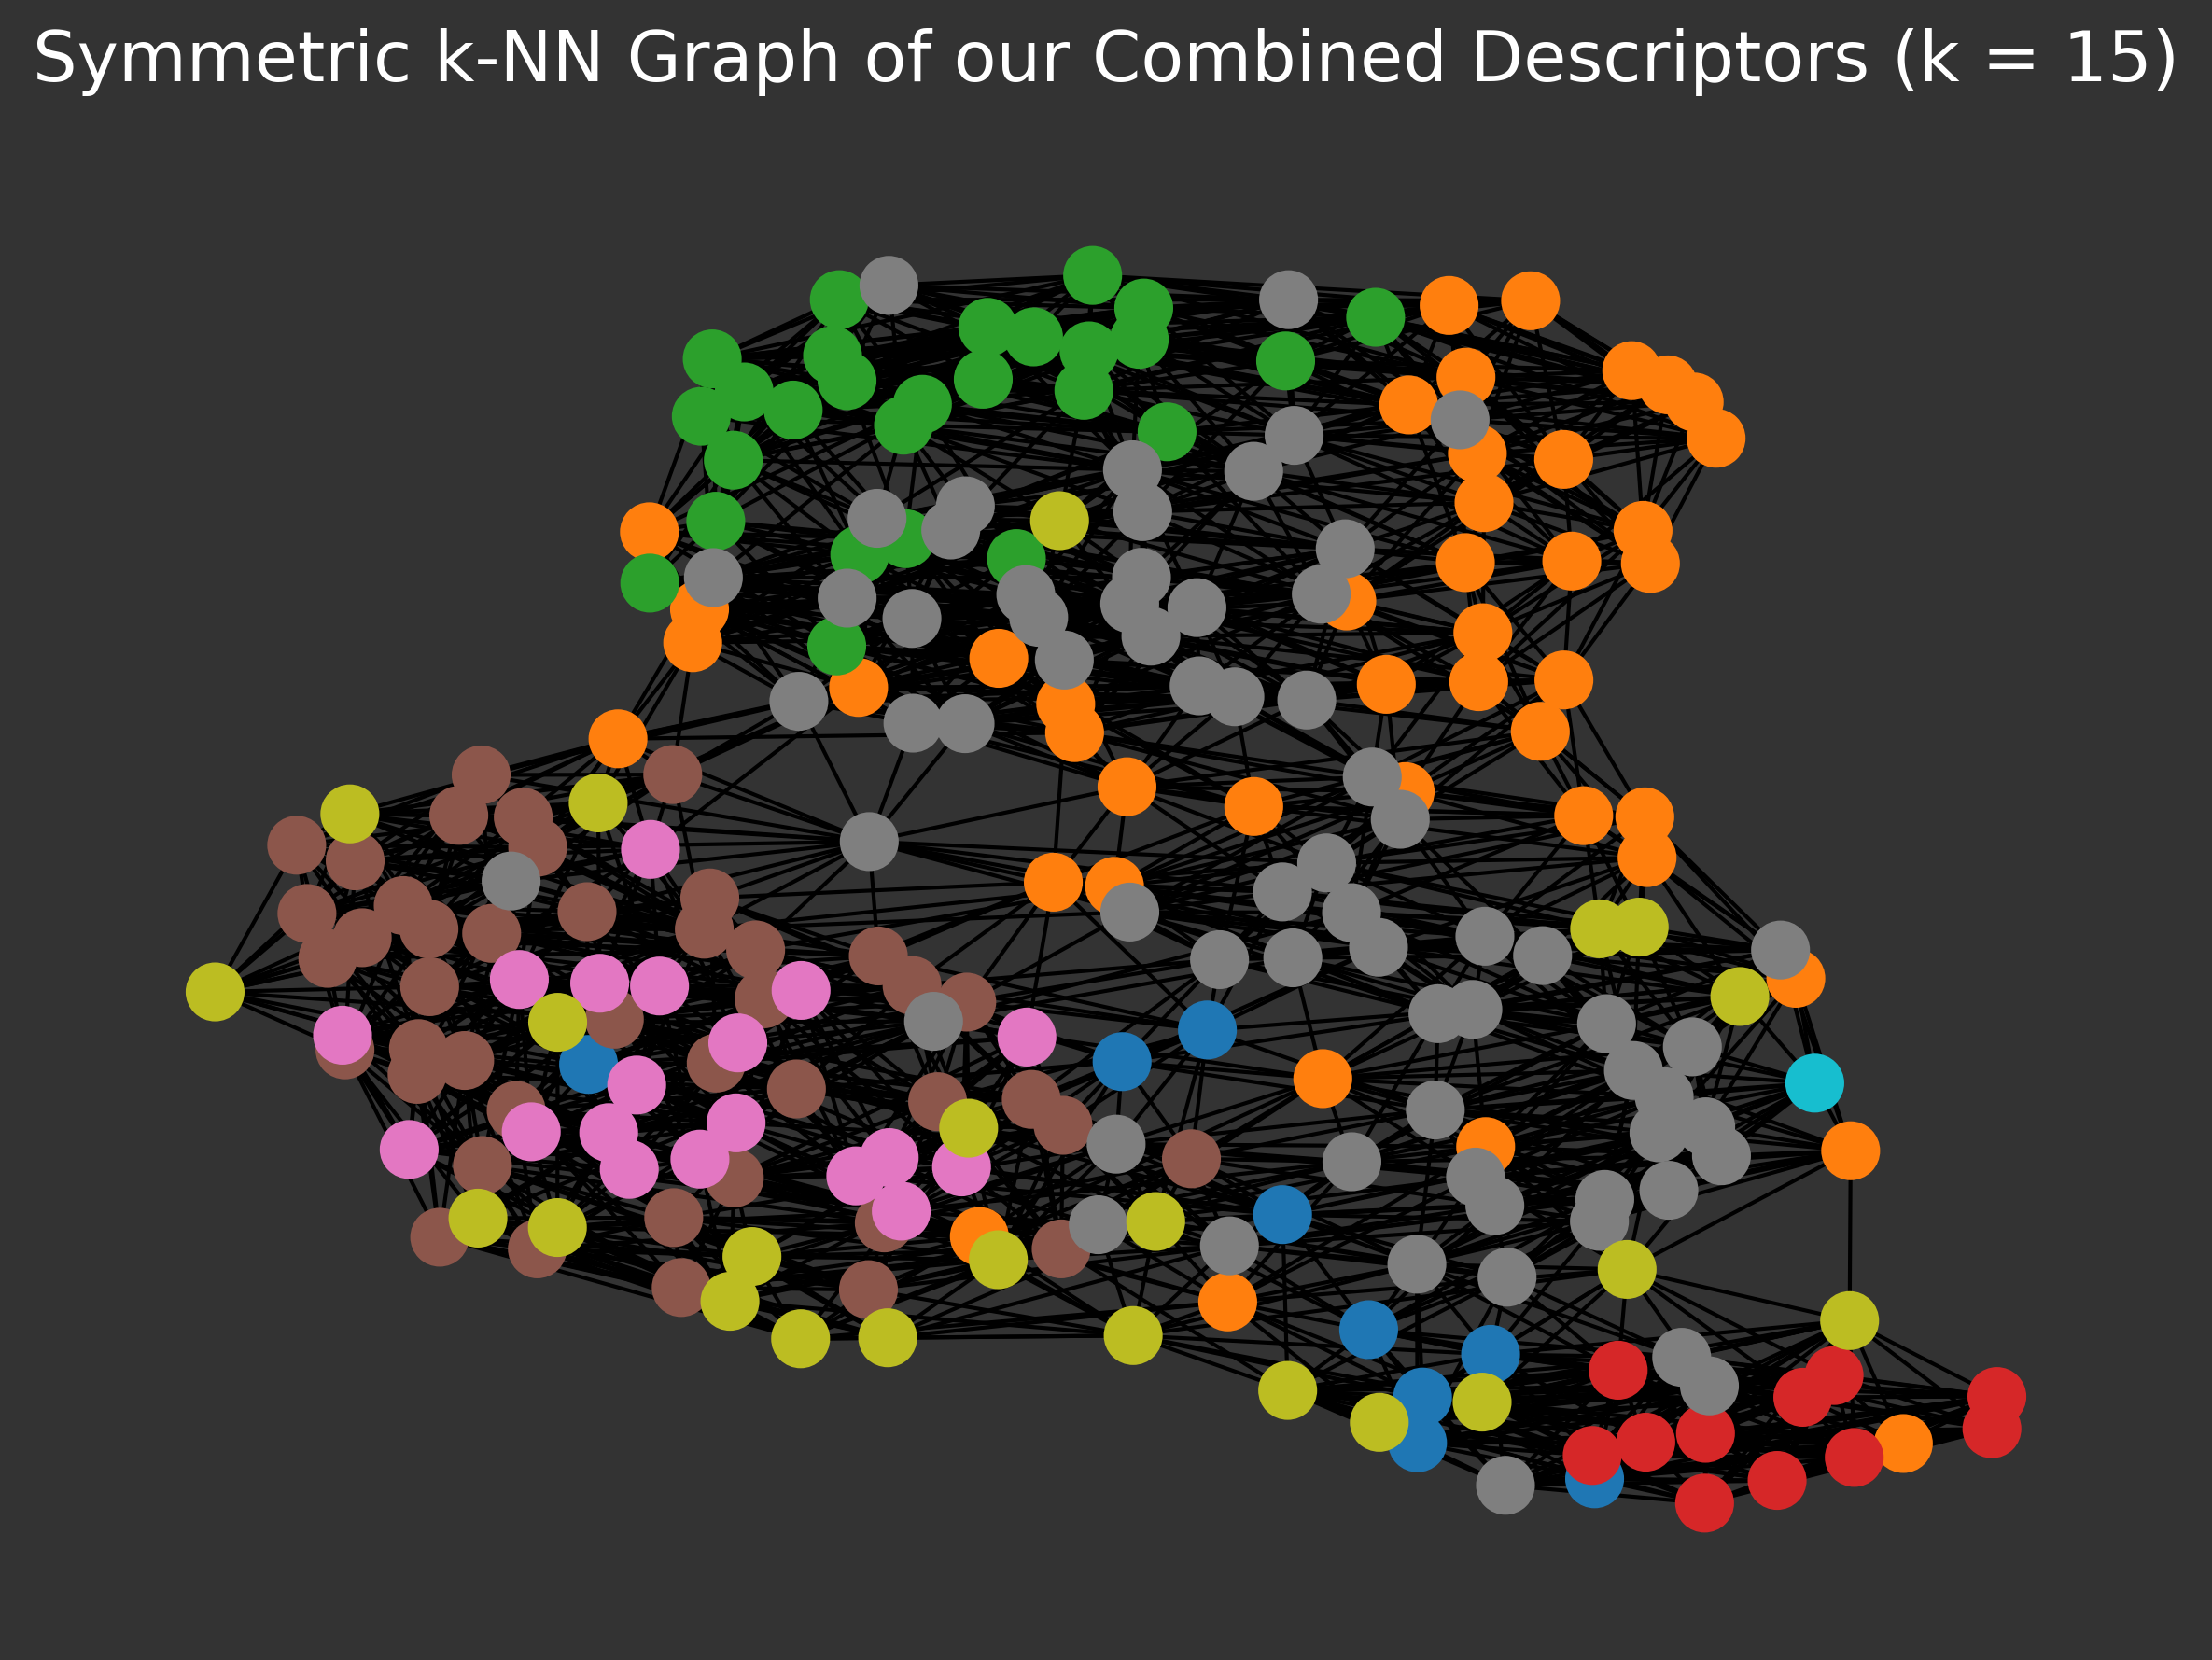

In [15]:
create_drawing(df, labels, ['evrap', 'samp_3d', 'scomp_3d', 'sirm_3d'], 15, 'symmetric', "k-NN Graph of our Combined Descriptors")

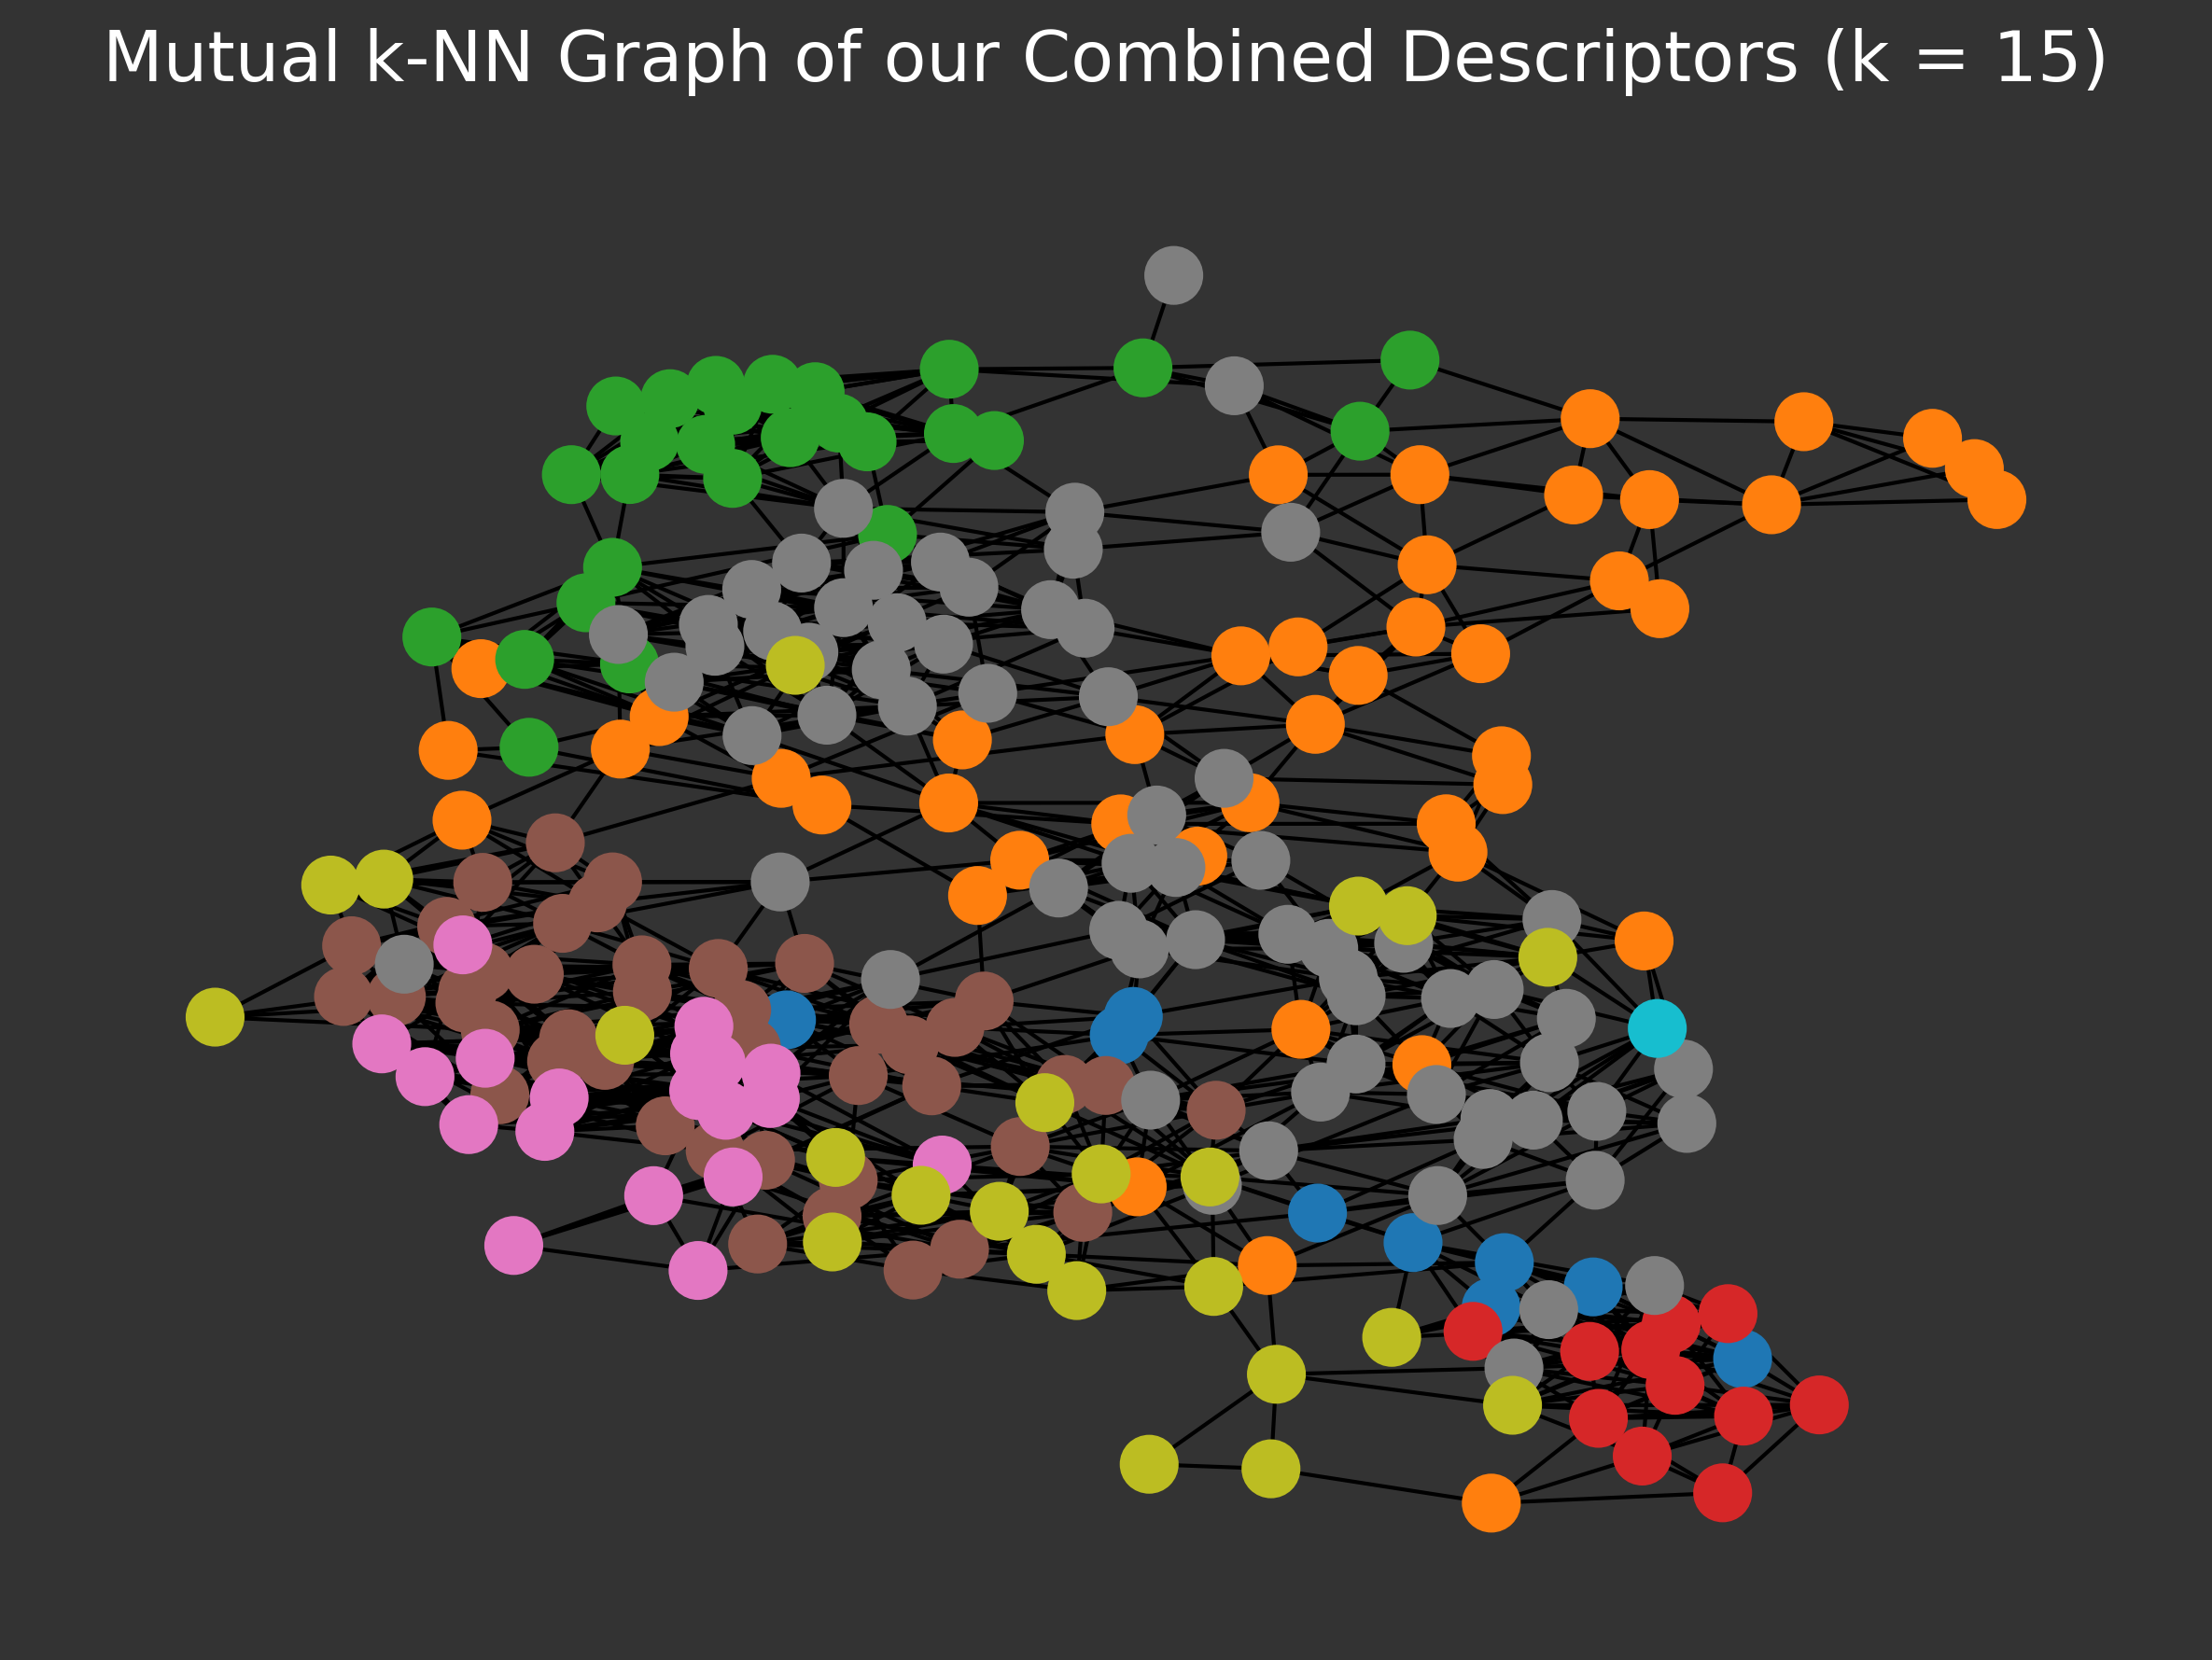

In [16]:
create_drawing(df, labels, ['evrap', 'samp_3d', 'scomp_3d', 'sirm_3d'], 15, 'mutual', "k-NN Graph of our Combined Descriptors")

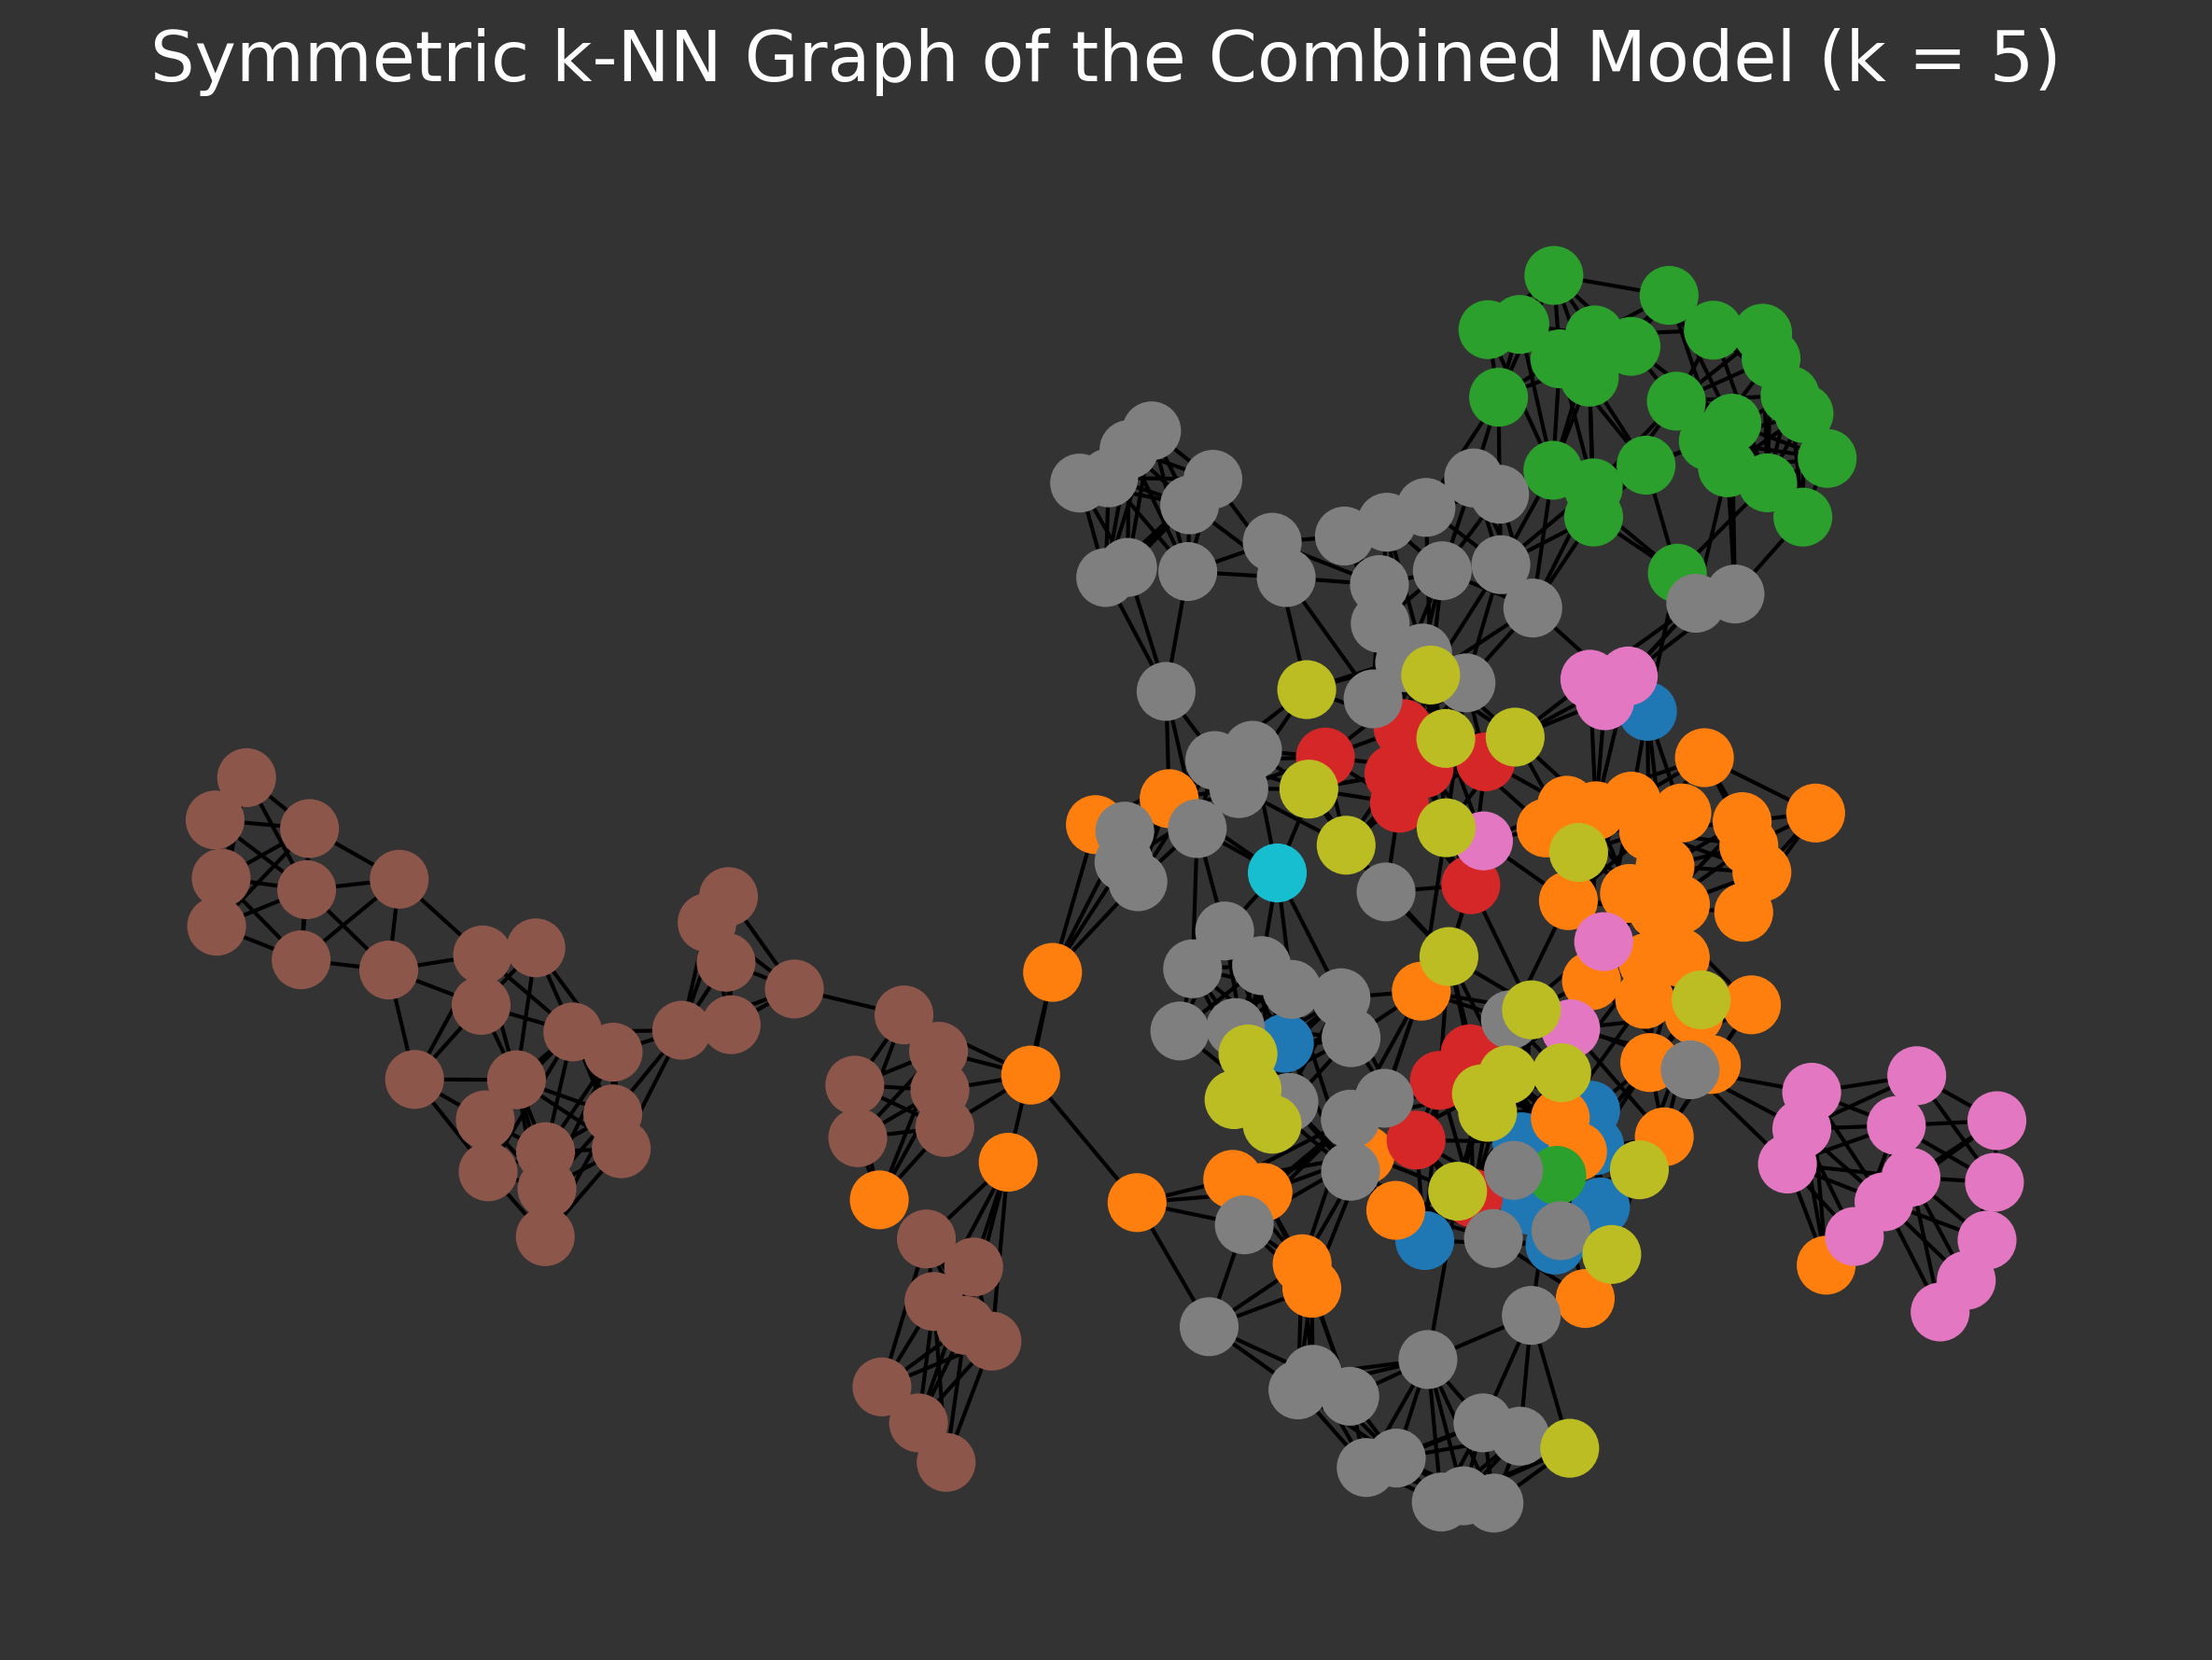

In [9]:
create_drawing(df, labels, ['combined_model'], 5, 'symmetric', "k-NN Graph of the Combined Model")

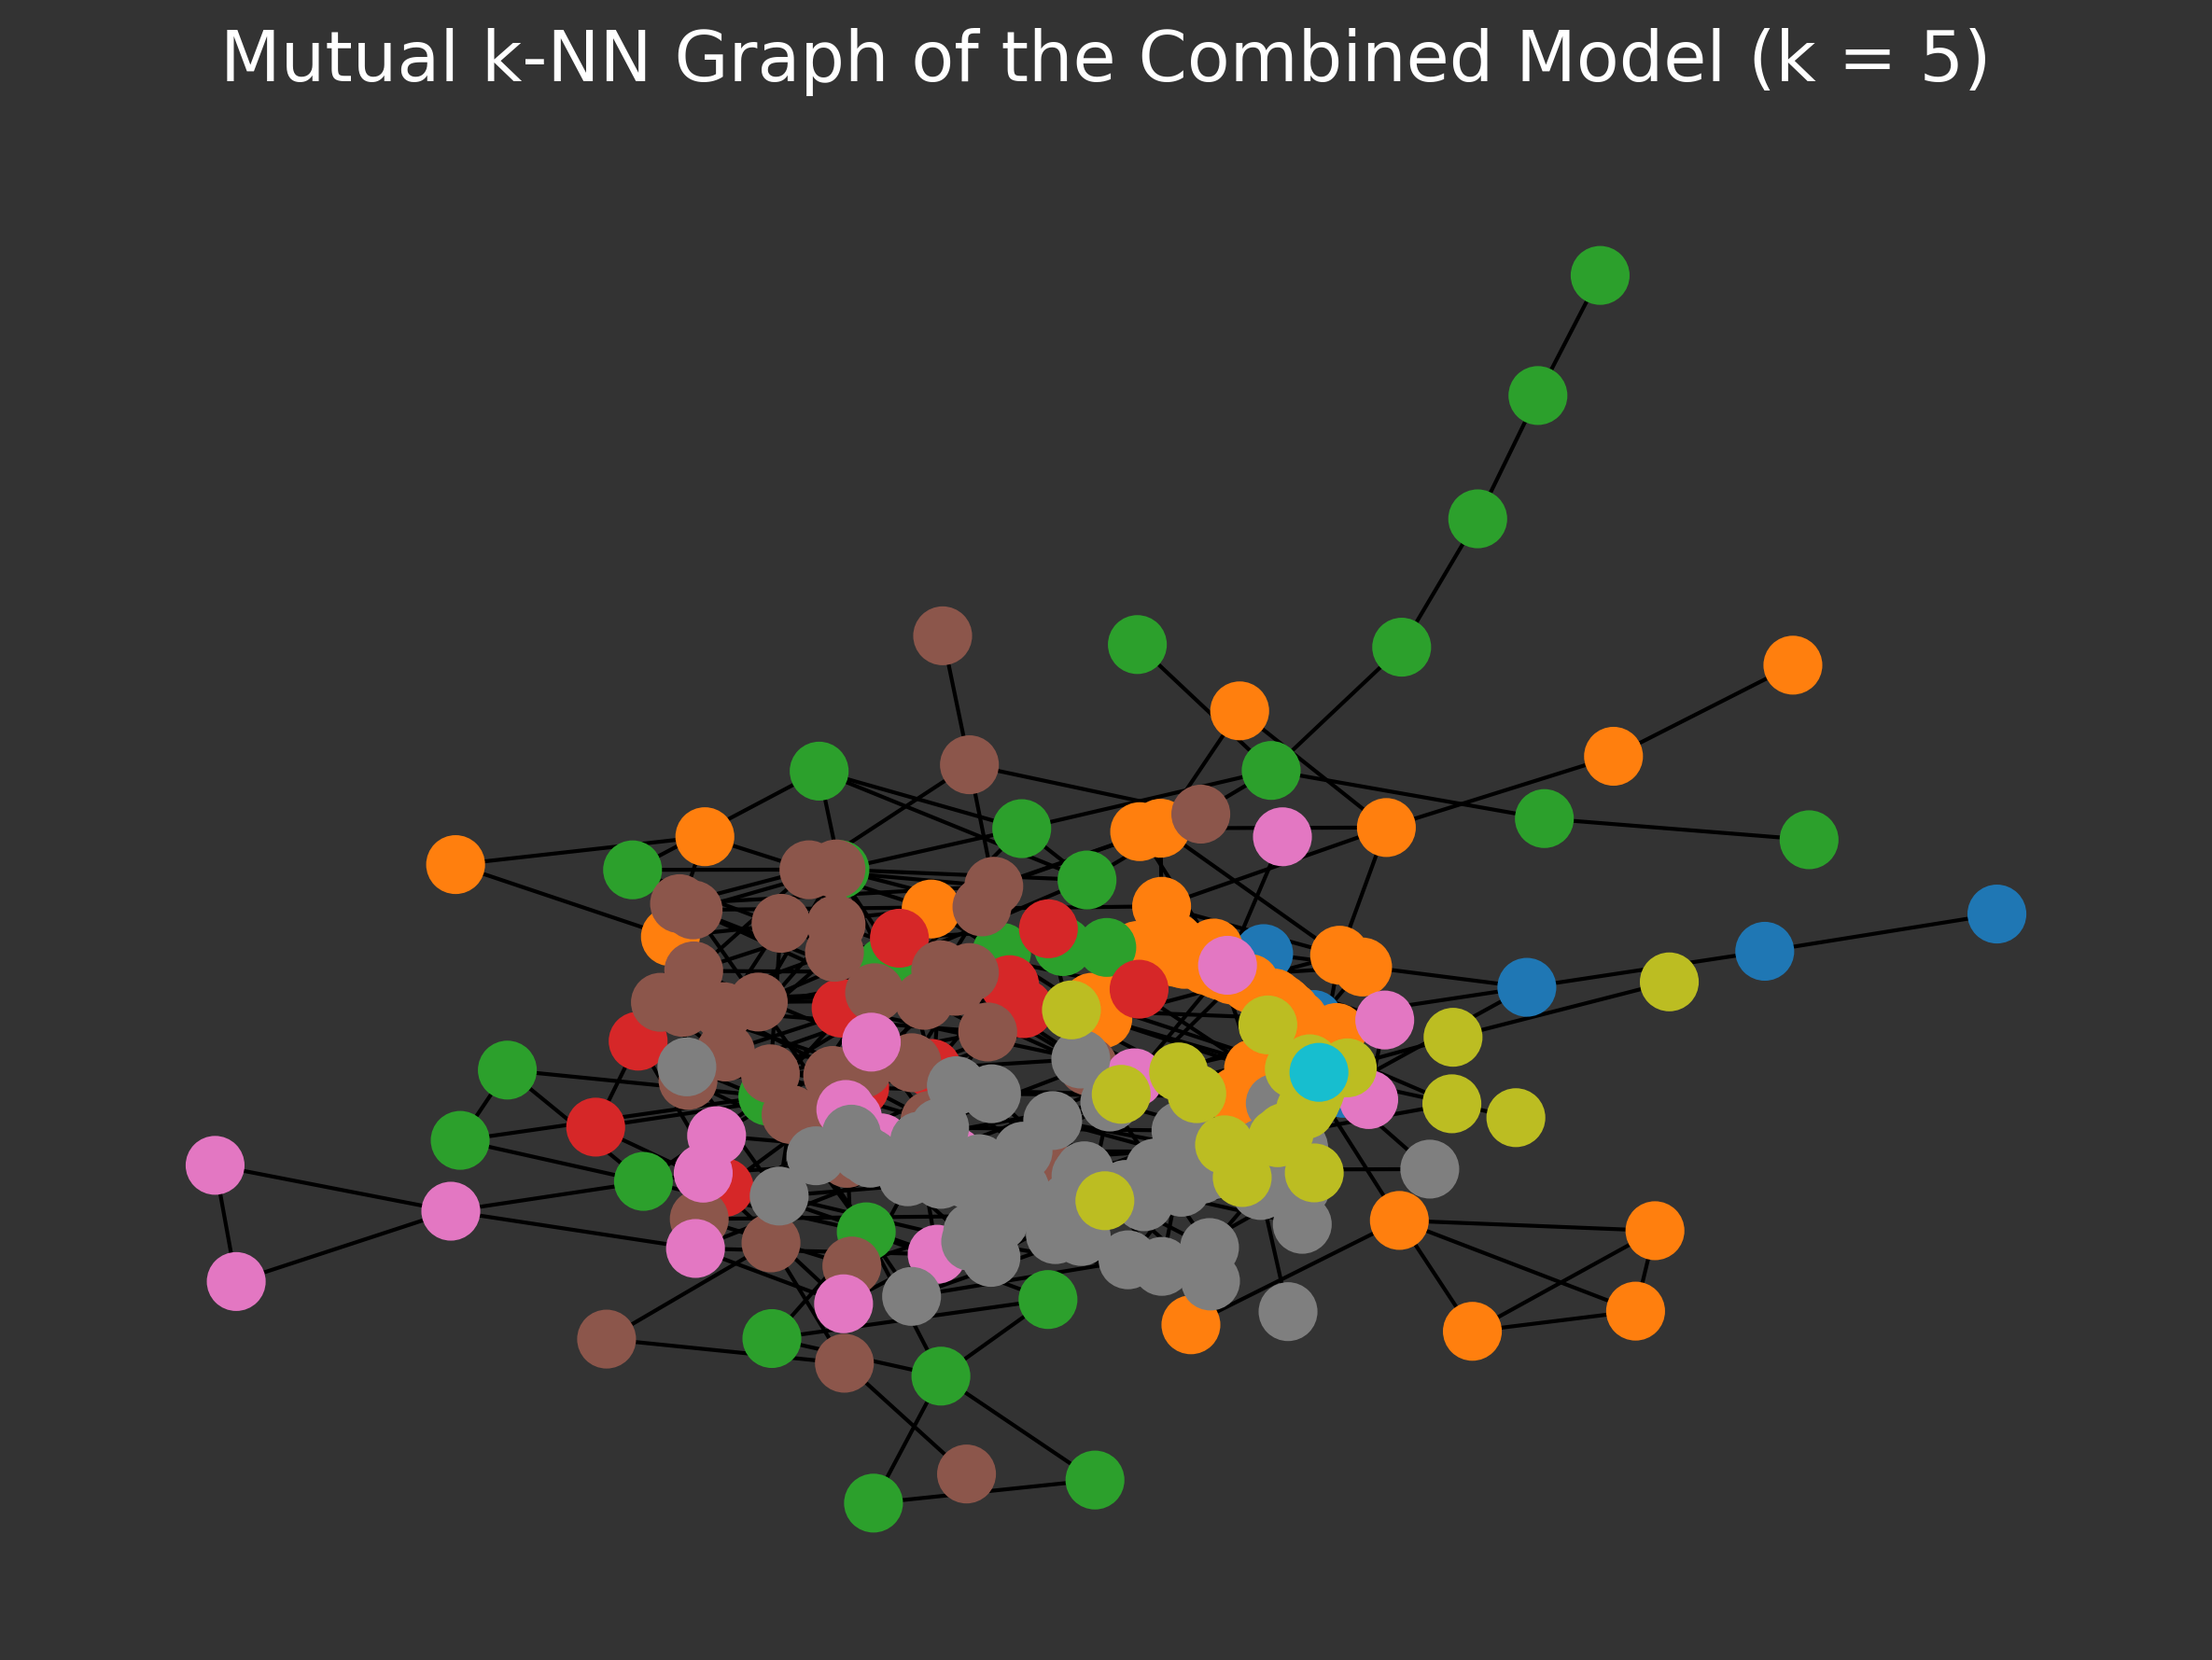

In [10]:
create_drawing(df, labels, ['combined_model'], 5, 'mutual', "k-NN Graph of the Combined Model")

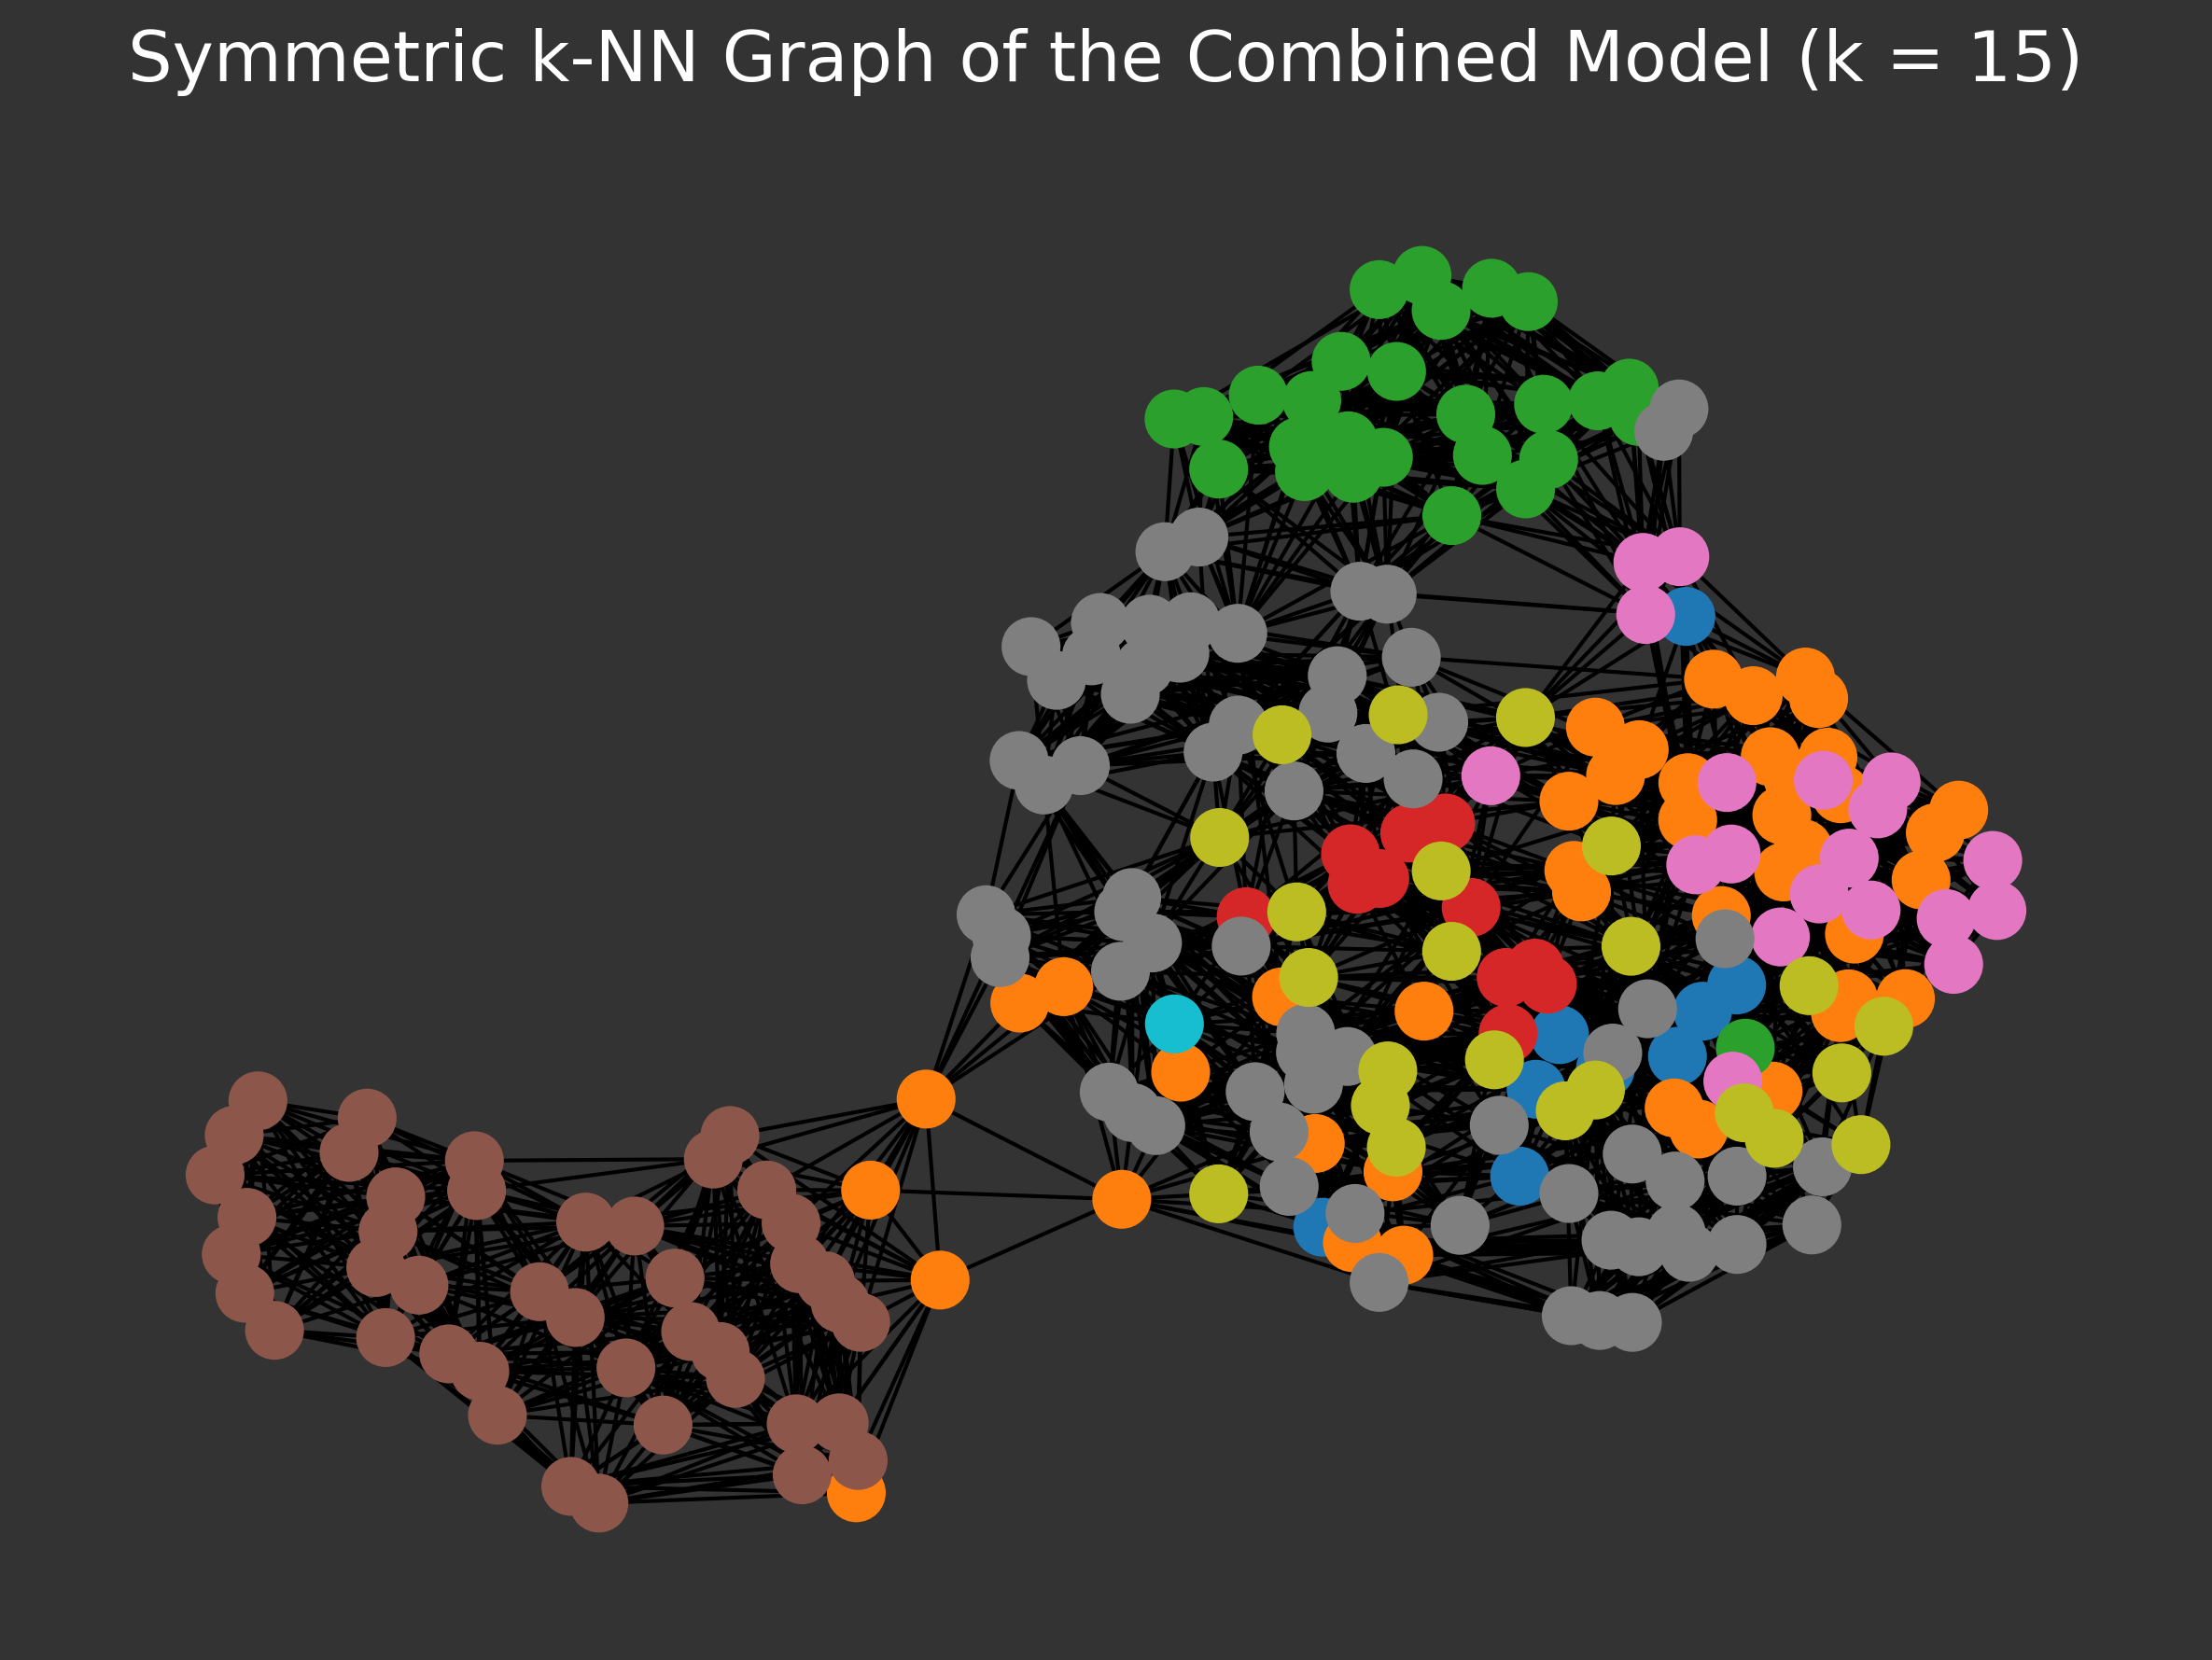

In [11]:
create_drawing(df, labels, ['combined_model'], 15, 'symmetric', "k-NN Graph of the Combined Model")

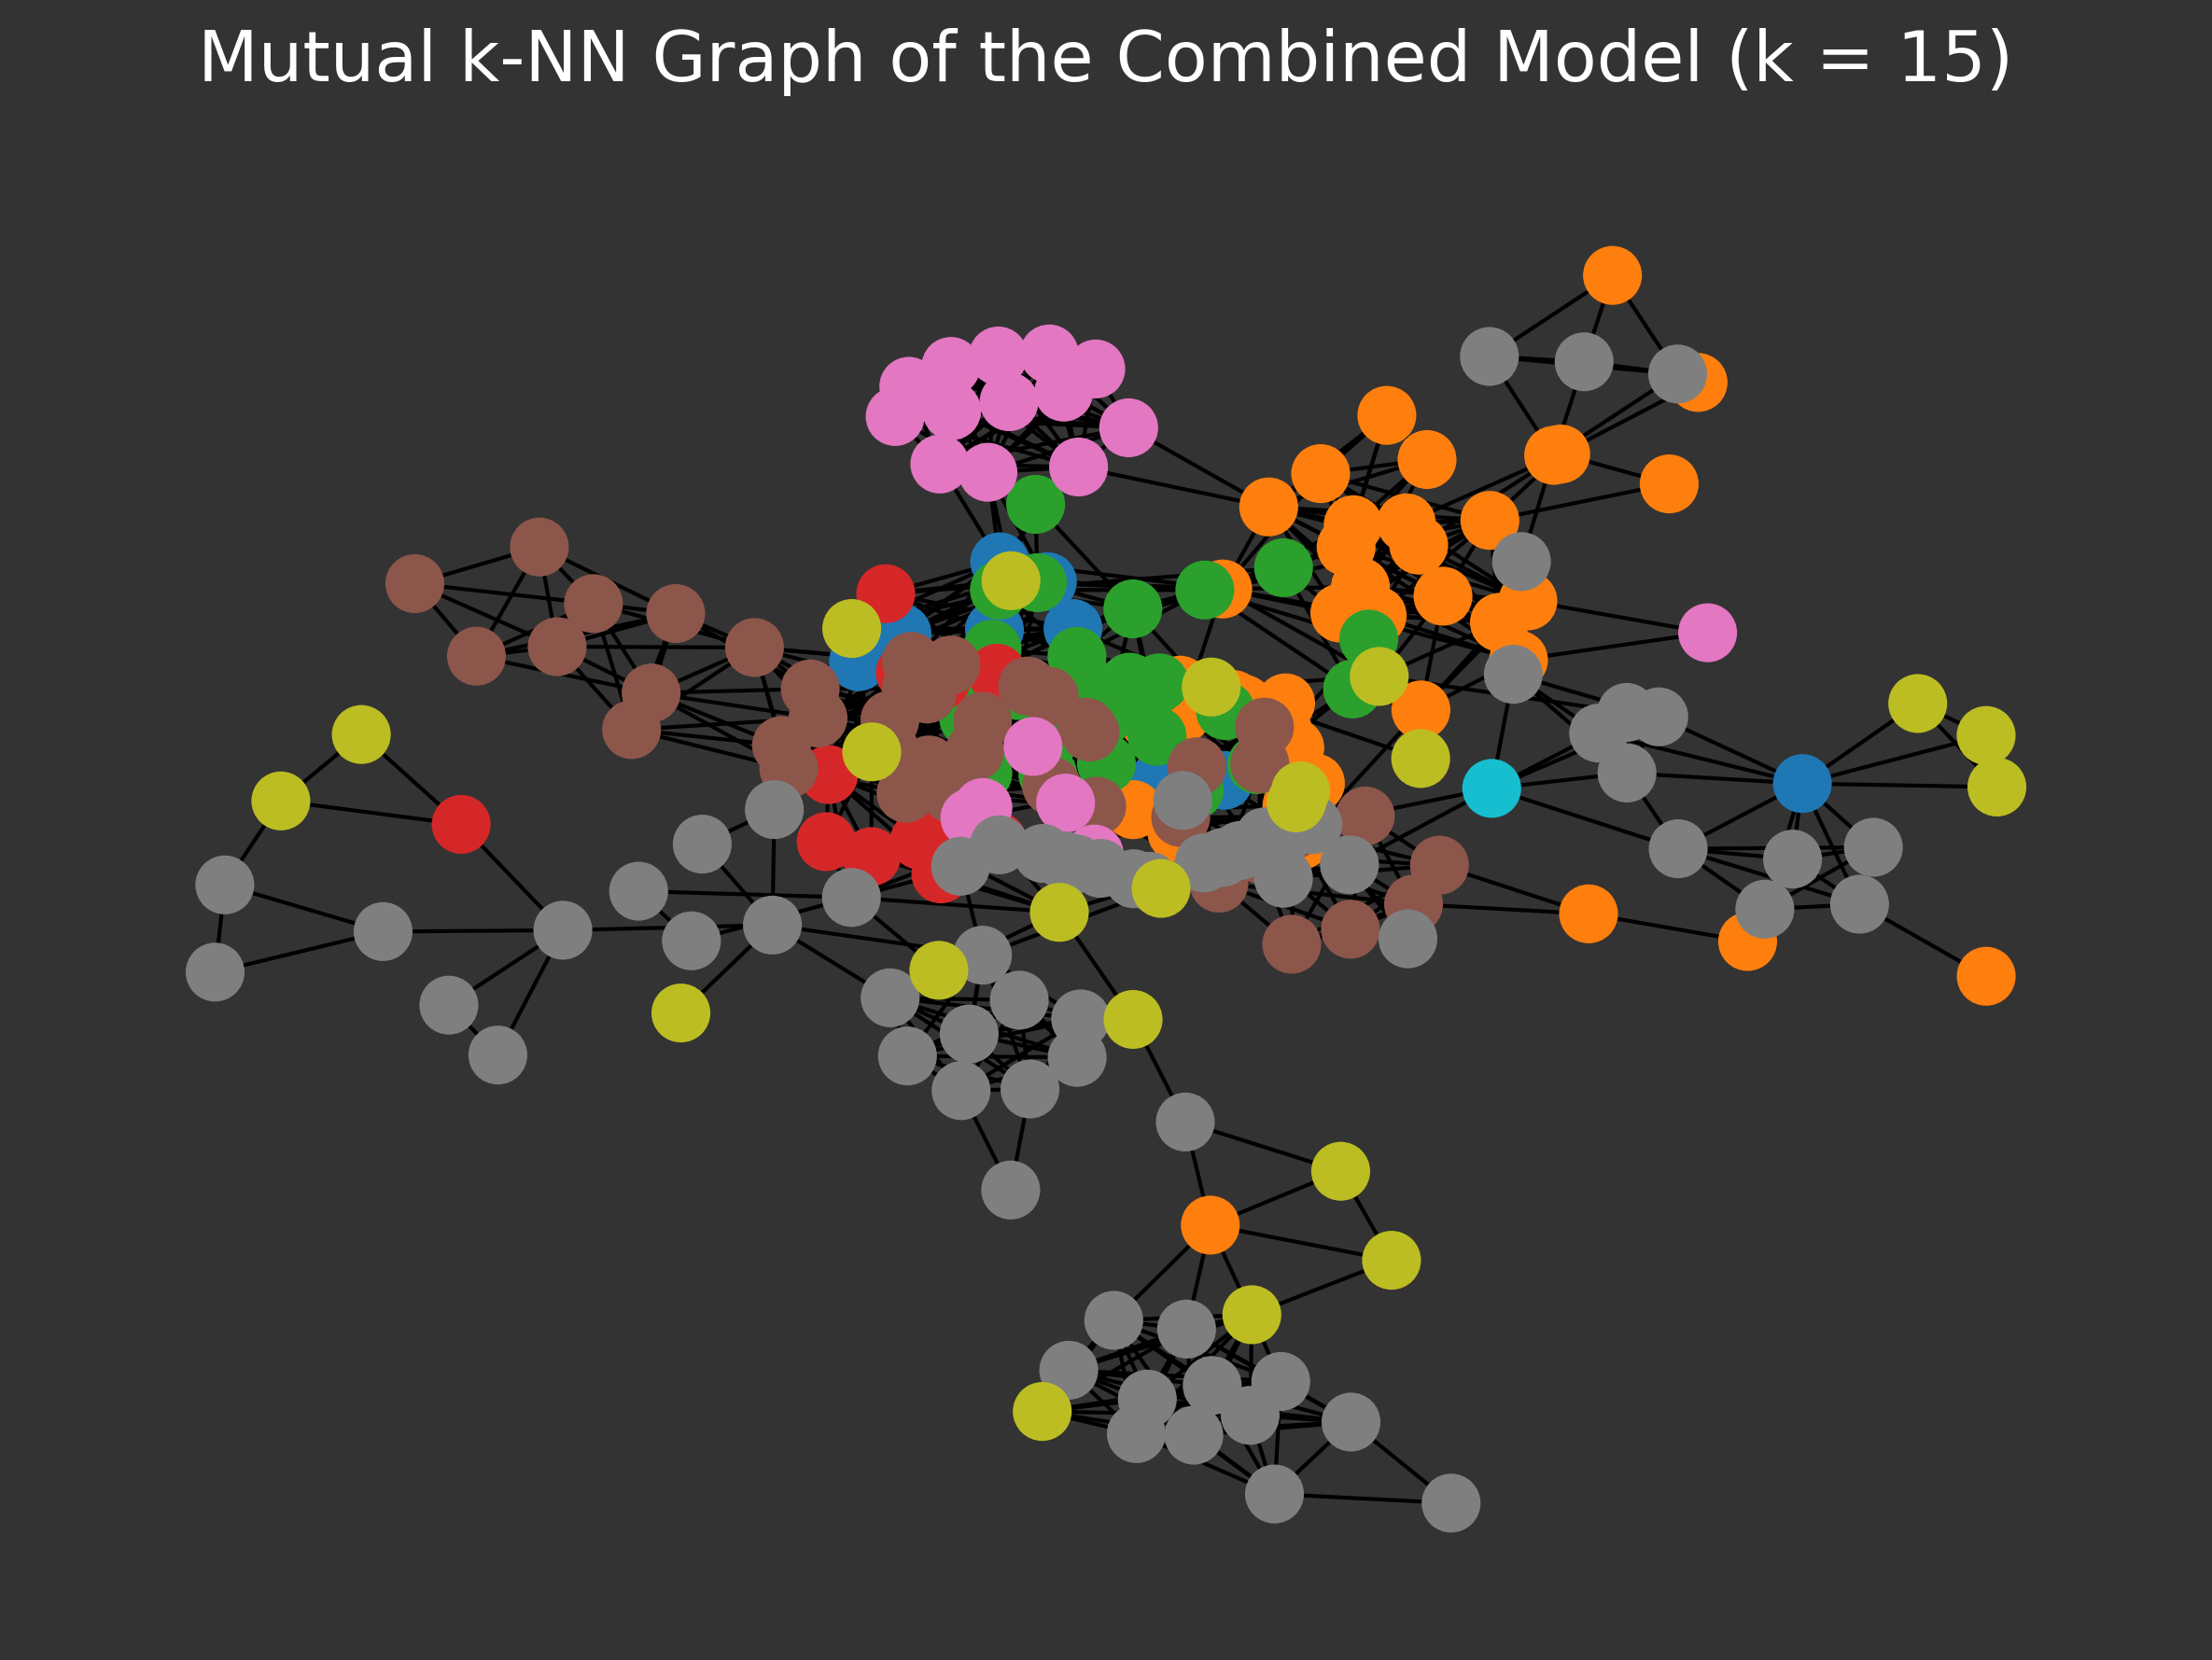

In [12]:
create_drawing(df, labels, ['combined_model'], 15, 'mutual', "k-NN Graph of the Combined Model")